In [ ]:
!pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import time
import numpy as np
import torch
import torch.nn.functional as F
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import os
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import zipfile
import math
from torch import nn
import torch.optim as optim
from torchvision import datasets, transforms
import shutil

if torch.cuda.is_available():
  torch.backends.cudnn.deterministic = True

In [ ]:
from google.colab import drive
drive.mount ('/content/gdrive')
!unzip "/content/gdrive/MyDrive/Malware_ISM/Malware1.zip" -d "/content/malware-images"

Streaming output truncated to the last 5000 lines.
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/0651671ce760ffbee5e9433b80724f2f.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/06524ebf396548004410f99a4dde2e54.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/06524f125eece7a54370609287188980.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/0652f1f4bad2c5c928080bc90db86ed1.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/0654748b4cc3330deef95ab0af4041cf.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/06549b73968ac1fc1e8eb54dddb10833.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/065513aa17b61f57cf793703a725c015.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/06583d83c5278fac7cd20c015780c1d0.png  
  inflating: /content/malware-images/Malimg_Dataset/Allaple.L/0658876855197e86e417ba8a84d298ec.png  
  inflating: /content/malware-images/Mal

In [ ]:
#HYPERPARAMETERS

batch_size = 32
num_epochs = 5

In [ ]:
transformer=transforms.Compose([
    transforms.Resize((256,256)),
    transforms.ToTensor(),  #0-255 to 0-1, numpy to tensors
])

In [ ]:
dataset_path = '/content/malware-images/Malimg_Dataset/'

def load_dataset():
    train_dataset_manual = torchvision.datasets.ImageFolder(dataset_path, transform=transformer)
    train_loader_manual = torch.utils.data.DataLoader(train_dataset_manual)
    return train_loader_manual


full_dataset = load_dataset()


train_size = int(0.6 * len(full_dataset))
test_size = int (0.2 * len(full_dataset))
valid_size = len(full_dataset) - train_size - test_size


train_dataset, test_dataset, valid_dataset = torch.utils.data.random_split(full_dataset.dataset, [train_size, test_size, valid_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=0, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=0, shuffle=True)

print('Full Dataset - ' + str(len(full_dataset)) + ' images.')
print('Train Set- ' + str(train_size) + ' images in ' + str(len(train_loader)) +' batches')
print('Testing Set - ' + str(test_size) + ' images in ' + str(len(test_loader)) + ' batches' )
print('Validation Set - ' + str(valid_size) + ' images in ' + str(len(valid_loader)) + ' batches')

Full Dataset - 9339 images.
Train Set- 5603 images in 176 batches
Testing Set - 1867 images in 59 batches
Validation Set - 1869 images in 59 batches


In [ ]:
for images, labels in train_loader:  
    print('Image batch dimensions:', images.shape)
    print('Image label dimensions:', labels.shape)
    break

Image batch dimensions: torch.Size([32, 3, 256, 256])
Image label dimensions: torch.Size([32])


In [ ]:
root = pathlib.Path (dataset_path)
classes = sorted ([j.name.split('/')[-1] for j in root.iterdir()])
print (classes)
print(len(classes))

['Adialer.C', 'Agent.FYI', 'Allaple.A', 'Allaple.L', 'Alueron.gen!J', 'Autorun.K', 'C2LOP.P', 'C2LOP.gen!g', 'Dialplatform.B', 'Dontovo.A', 'Fakerean', 'Instantaccess', 'Lolyda.AA1', 'Lolyda.AA2', 'Lolyda.AA3', 'Lolyda.AT', 'Malex.gen!J', 'Obfuscator.AD', 'Rbot!gen', 'Skintrim.N', 'Swizzor.gen!E', 'Swizzor.gen!I', 'VB.AT', 'Wintrim.BX', 'Yuner.A']
25


In [ ]:
device = torch.device ("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv5 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(256)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 8 * 8, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 25)
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.bn1(F.relu(self.conv1(x)))
        x = self.pool(x)
        x = self.bn2(F.relu(self.conv2(x)))
        x = self.pool(x)
        x = self.bn3(F.relu(self.conv3(x)))
        x = self.pool(x)
        x = self.bn4(F.relu(self.conv4(x)))
        x = self.pool(x)
        x = self.bn5(F.relu(self.conv5(x)))
        x = self.pool(x)
        x = x.view(-1, 256 * 8 * 8)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

In [ ]:
net = MyModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [ ]:
path='/content/gdrive/MyDrive/Malware_ISM/Malware_25Epochs'
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
!pip install efficientnet_pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from efficientnet_pytorch import EfficientNet
PATHa = '/content/gdrive/MyDrive/content/EfficientNet/Malware_25Epochs'
PATHb = '/content/gdrive/MyDrive/Malware_ISM/Malware_15Epochs'

#Load Models
modelA = MyModel() 
modelB = EfficientNet.from_pretrained('efficientnet-b0').to(device)

Loaded pretrained weights for efficientnet-b0


In [ ]:
import torch.nn as nn

# define new instance of the model
modelA = MyModel()

# load state_dict into the new model instance
modelA.load_state_dict(torch.load(PATHb))

<All keys matched successfully>

In [ ]:
modelB.load_state_dict(torch.load(PATHa))

RuntimeError: ignored

In [ ]:
class Ensemble(nn.Module):
    def __init__(self, model1, model2):
        super(Ensemble, self).__init__()
        self.model1 = model1
        self.model2 = model2
        
    def forward(self, x):
        out1 = self.model1(x)
        out2 = self.model2(x)
        out = (out1 + out2) / 2
        return out
model1 = modelA
model2 = modelB
model2._fc = nn.Linear(in_features=model2._fc.in_features, out_features=25, bias=True)
ensemble_model = Ensemble(model1, model2)

In [ ]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(ensemble_model.parameters(), lr=0.001)

# Move the model to the GPU
ensemble_model = ensemble_model.to(device)

In [ ]:
import tensorflow as tf
checkpoint_path = "/content/gdrive/MyDrive/Malware_ISM/Malware_Combined_5Epochs"

cp_callback = tf.keras.callbacks.ModelCheckpoint(
   checkpoint_path, verbose=1, save_weights_only=True,
   # Save weights, every epoch.
   save_freq='epoch')

In [ ]:
num_epochs = 15
for epoch in range(num_epochs):
    # training
    ensemble_model.train()
    train_running_loss = 0.0
    train_correct = 0
    train_total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = ensemble_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()
    
    train_loss = train_running_loss / len(train_loader)
    train_accuracy = 100 * train_correct / train_total
    
    # validation
    ensemble_model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = ensemble_model(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()
    
    val_loss = val_running_loss / len(valid_loader)
    val_accuracy = 100 * val_correct / val_total
    
    # print results
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.2f}% | Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

Epoch 1/15 | Train Loss: 0.0817 | Train Acc: 98.73% | Val Loss: 3.4048 | Val Acc: 95.51%
Epoch 2/15 | Train Loss: 0.0512 | Train Acc: 98.79% | Val Loss: 0.0707 | Val Acc: 98.29%
Epoch 3/15 | Train Loss: 0.0685 | Train Acc: 98.95% | Val Loss: 0.0441 | Val Acc: 98.88%
Epoch 4/15 | Train Loss: 0.6375 | Train Acc: 98.18% | Val Loss: 0.2098 | Val Acc: 97.54%
Epoch 5/15 | Train Loss: 1.0090 | Train Acc: 97.04% | Val Loss: 0.0650 | Val Acc: 98.39%
Epoch 6/15 | Train Loss: 0.2101 | Train Acc: 97.48% | Val Loss: 0.0377 | Val Acc: 98.98%
Epoch 7/15 | Train Loss: 0.0467 | Train Acc: 98.80% | Val Loss: 0.0565 | Val Acc: 98.77%
Epoch 8/15 | Train Loss: 0.0270 | Train Acc: 99.29% | Val Loss: 0.0348 | Val Acc: 99.09%
Epoch 9/15 | Train Loss: 0.0844 | Train Acc: 99.23% | Val Loss: 0.0491 | Val Acc: 98.88%
Epoch 10/15 | Train Loss: 0.2964 | Train Acc: 98.88% | Val Loss: 0.0661 | Val Acc: 98.82%
Epoch 11/15 | Train Loss: 0.1156 | Train Acc: 98.22% | Val Loss: 0.1977 | Val Acc: 97.75%
Epoch 12/15 | Train

In [ ]:
torch.save(net.state_dict(),'/content/gdrive/MyDrive/Malware_ISM/Malware_Combined_20Epochs')

In [ ]:
path='/content/gdrive/MyDrive/Malware_ISM/Malware_Combined_20Epochs'
net.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
print(ensemble_model.keys())

odict_keys(['conv1.weight', 'conv1.bias', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'conv2.weight', 'conv2.bias', 'bn2.weight', 'bn2.bias', 'bn2.running_mean', 'bn2.running_var', 'bn2.num_batches_tracked', 'conv3.weight', 'conv3.bias', 'bn3.weight', 'bn3.bias', 'bn3.running_mean', 'bn3.running_var', 'bn3.num_batches_tracked', 'conv4.weight', 'conv4.bias', 'bn4.weight', 'bn4.bias', 'bn4.running_mean', 'bn4.running_var', 'bn4.num_batches_tracked', 'conv5.weight', 'conv5.bias', 'bn5.weight', 'bn5.bias', 'bn5.running_mean', 'bn5.running_var', 'bn5.num_batches_tracked', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias', 'fc3.weight', 'fc3.bias'])


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y_pred = []
y_true = []

# iterate over test data
#for inputs, labels in test_loader:
for i, (images, labels) in enumerate(test_loader):
    images, labels = images.to(device), labels.to(device)

    net = net.to(device)
    output = net(images) # Feed Network

    output = (torch.max(torch.exp(output), 1)[1])
    output = output.data.cpu().numpy()

    y_pred.extend(output) # Save Prediction
        
    labels1 = labels.data.cpu().numpy()
    y_true.extend(labels1) # Save Trut

In [ ]:
print (len(y_pred))
print (len(y_true))

1867
1867


In [ ]:
print(y_pred)
print(y_true)

[19, 5, 0, 18, 11, 5, 5, 5, 11, 0, 0, 10, 5, 0, 24, 5, 10, 15, 5, 11, 5, 22, 10, 5, 9, 13, 10, 5, 0, 5, 5, 19, 18, 5, 0, 10, 10, 15, 0, 5, 5, 19, 5, 18, 10, 0, 5, 5, 5, 5, 10, 5, 19, 18, 20, 5, 5, 13, 5, 5, 5, 18, 10, 5, 5, 0, 5, 22, 10, 0, 5, 20, 0, 5, 18, 5, 18, 24, 5, 0, 0, 5, 10, 10, 5, 19, 5, 5, 0, 5, 16, 5, 5, 13, 19, 19, 5, 5, 10, 19, 5, 5, 5, 5, 5, 0, 5, 18, 5, 0, 5, 18, 5, 5, 5, 5, 20, 5, 10, 5, 18, 8, 0, 22, 5, 19, 4, 0, 5, 5, 5, 0, 24, 5, 10, 5, 10, 17, 5, 19, 10, 9, 5, 9, 5, 5, 18, 5, 5, 19, 10, 5, 5, 0, 19, 11, 13, 5, 5, 5, 5, 5, 5, 5, 19, 24, 0, 10, 0, 9, 11, 19, 5, 5, 5, 13, 0, 5, 0, 0, 5, 10, 10, 5, 18, 5, 18, 9, 5, 5, 0, 18, 5, 23, 5, 9, 5, 19, 23, 10, 10, 5, 0, 5, 19, 5, 10, 5, 13, 5, 18, 5, 5, 19, 10, 13, 19, 19, 5, 20, 5, 19, 5, 10, 18, 24, 5, 5, 5, 0, 5, 5, 10, 10, 5, 5, 18, 19, 5, 5, 24, 5, 5, 19, 5, 0, 0, 5, 5, 0, 0, 7, 19, 5, 23, 20, 5, 15, 9, 5, 5, 5, 13, 22, 5, 19, 13, 5, 18, 18, 0, 5, 19, 19, 19, 5, 0, 19, 20, 13, 19, 5, 5, 18, 20, 0, 15, 5, 5, 0, 15, 5, 10, 

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<Axes: >

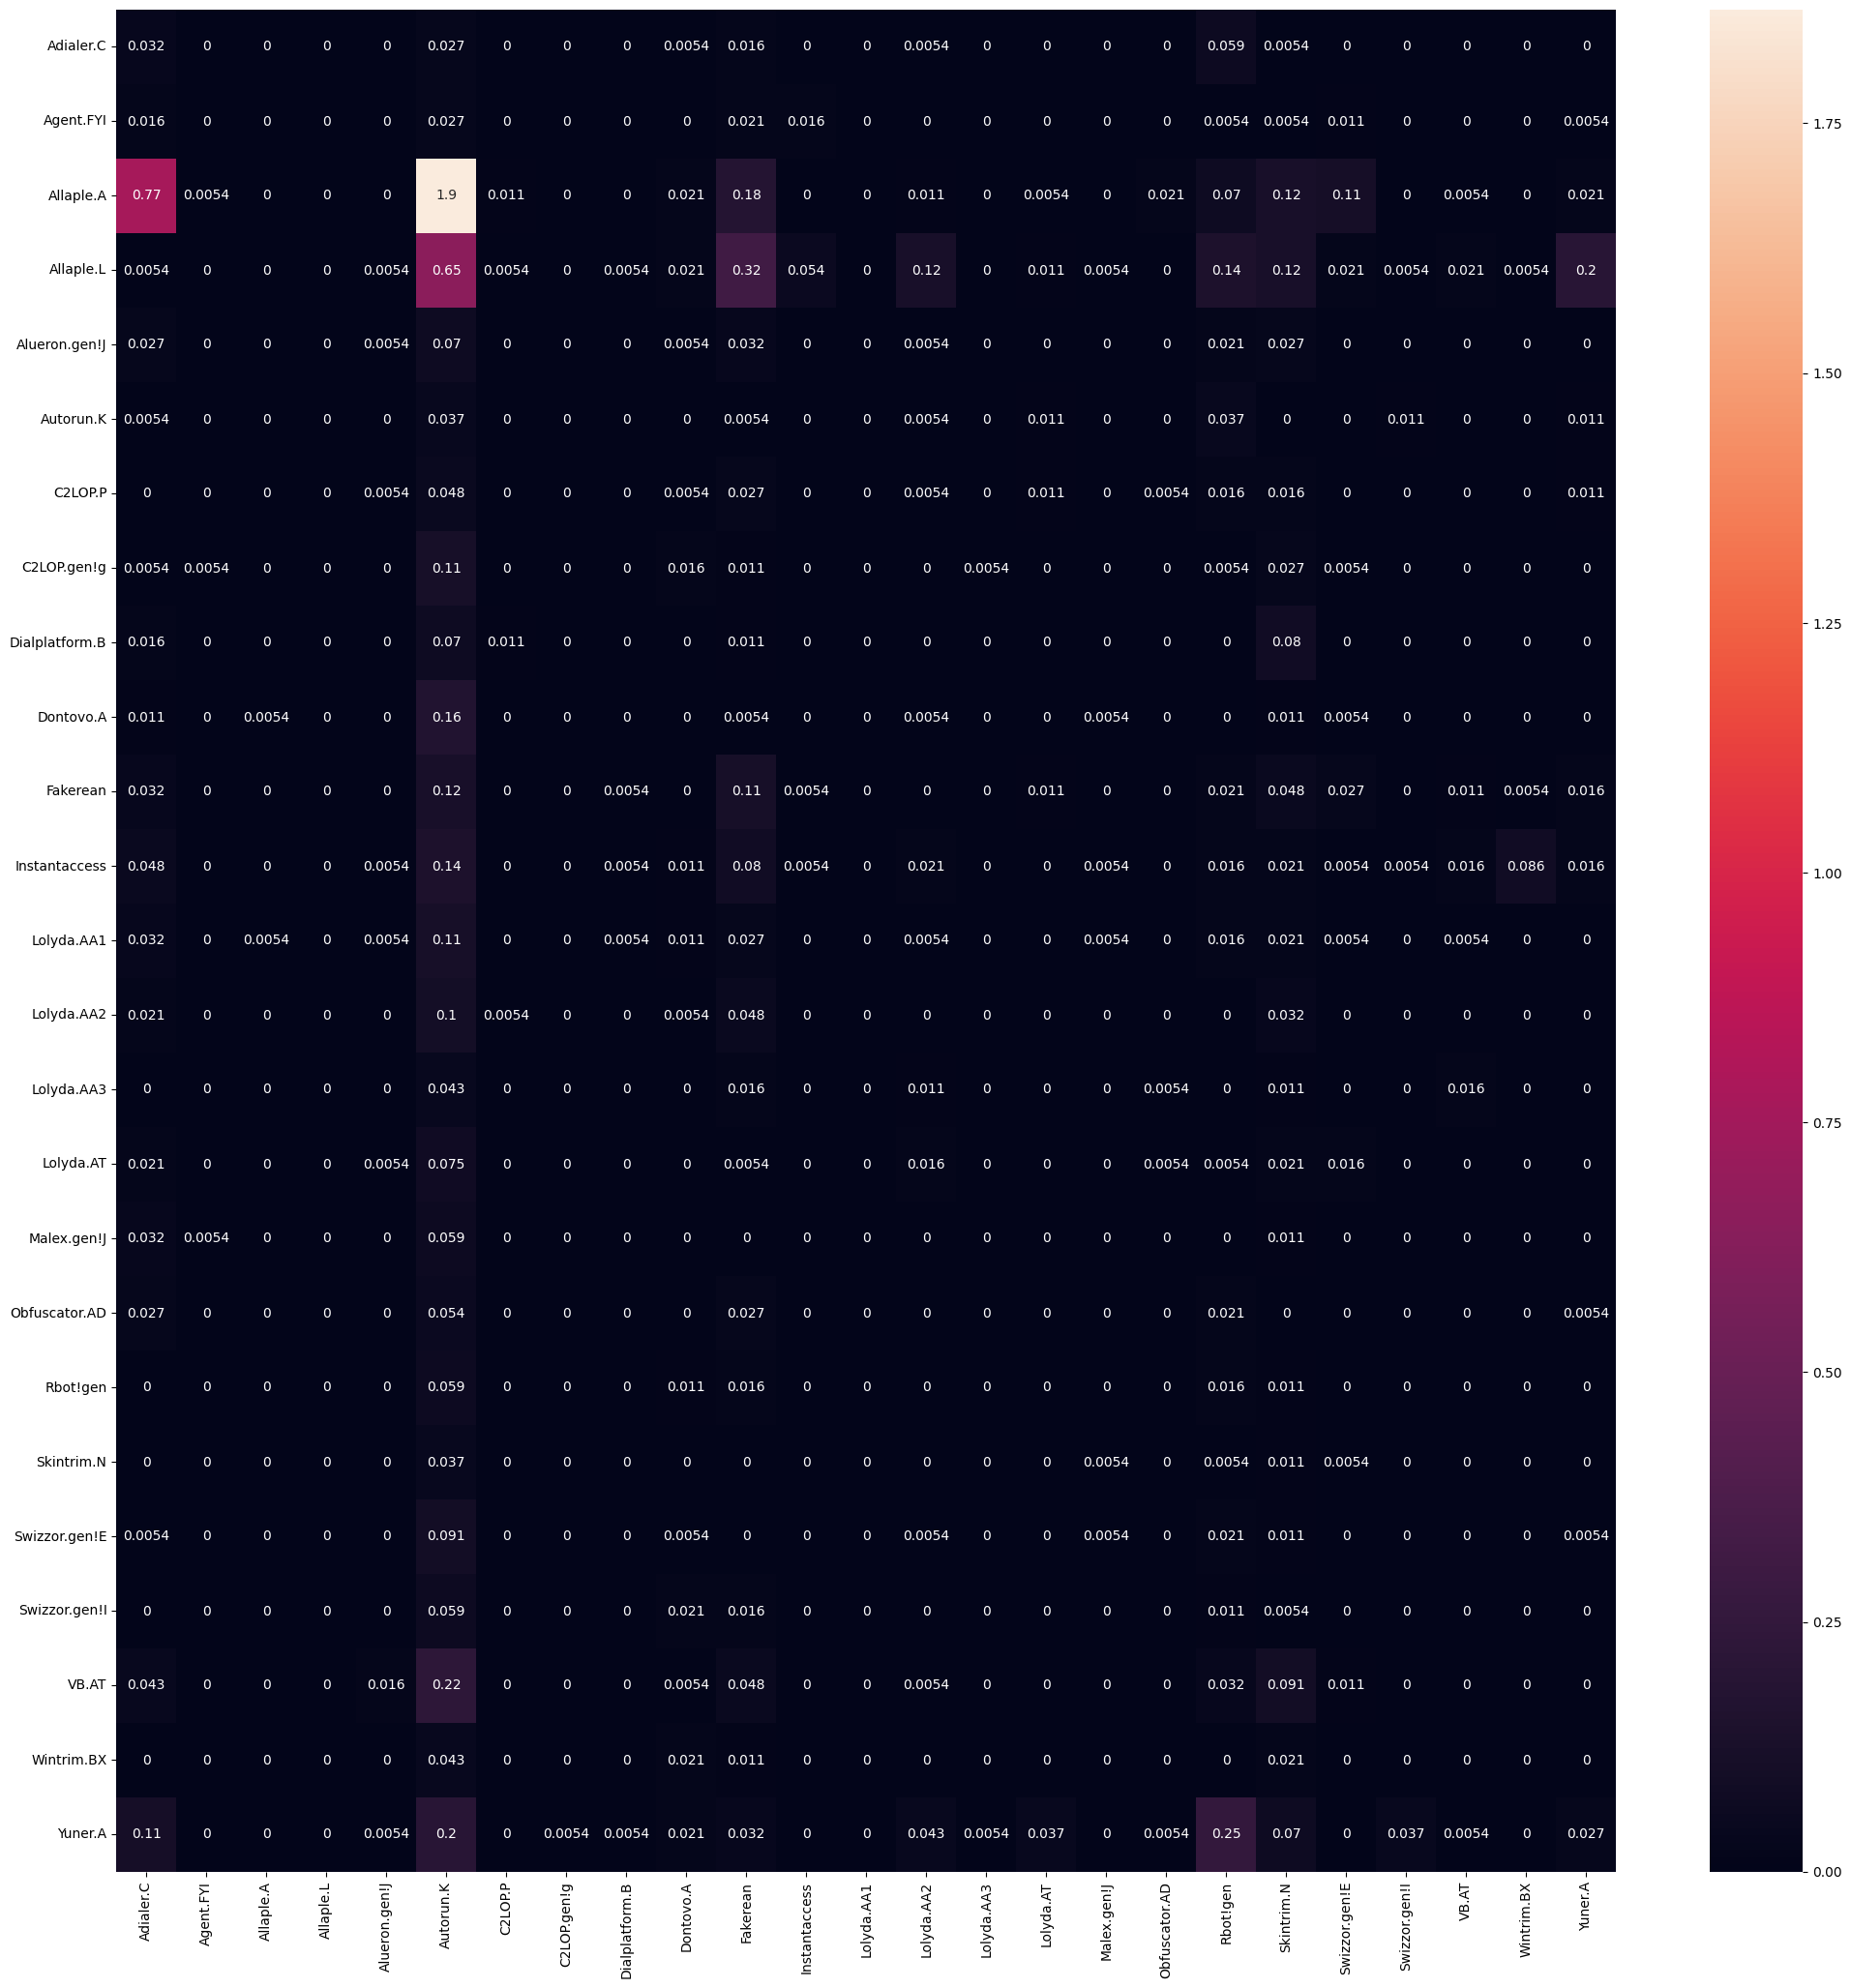

In [ ]:
import pandas as pd
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix) *10, index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (25,25))
sn.heatmap(df_cm, annot=True)

In [ ]:
classification_report(y_true, y_pred,zero_division=0,output_dict=True)

{'0': {'precision': 0.02553191489361702,
  'recall': 0.21428571428571427,
  'f1-score': 0.045627376425855515,
  'support': 28},
 '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 20},
 '2': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 599},
 '3': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 320},
 '4': {'precision': 0.1,
  'recall': 0.027777777777777776,
  'f1-score': 0.04347826086956522,
  'support': 36},
 '5': {'precision': 0.008353221957040573,
  'recall': 0.30434782608695654,
  'f1-score': 0.016260162601626015,
  'support': 23},
 '6': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 28},
 '7': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 36},
 '8': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 35},
 '9': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 39},
 '10': {'precision': 0.10606060606060606,
  'recall': 0.2692307692307692,
  'f1-score': 0.15217391304347827,
  'suppor